# SC2001 Project 1 (SCSB - Team 4)

## Integration of Mergesort & Insertion Sort
In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency.

The idea is to set a small integer S as a threshold for the size of subarrays.
Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

In [16]:


import numpy as np
import matplotlib.pyplot as plt
import random # Generate random number for array size
np.set_printoptions(threshold = 300)
import time
import math

`numpy`: to use the array concept and time optimization since it underlayer code use C
mathpli

# (a) Algorithm implementation

## The `swap` function

Swaps positions of two elenments in the array in `insertionSort()` function:

In [17]:
def swap(arr, idex1, idex2):
    arr[idex1], arr[idex2] = arr[idex2], arr[idex1]

## Insertion Sort

Implement the `insertionSort()` taught in the lecture:

In [18]:
def insertionSort(arr, keyC, left, right):
    '''
    Arguments:
        arr (np.array): array to be sorted
        keyC (int)    : number of key comparisons so far
        left (int)    : starting index of the subarray
        right (int)   : ending index of the subarray (NOT the array size)

    Return:
        keyC  (int)   : number of key comparisons after sorting
    '''

    # Trivial case: If subarray has 0 or 1 element, nothing to sort
    if left >= right:
        return keyC

    # Outer loop: Traverse each element in the subarray
    for i in range(left, right + 1):
        # Inner loop: Compare current element backwards with previous elements
        for j in range(i, left, -1):
            if arr[j] < arr[j - 1]:
                keyC += 1                 
                swap(arr, j, j - 1)       
            else:
                keyC += 1                 
                break                     # stop when correct position is found

    return keyC


## Merge the two sorted subarrays

Implement the `merge()` taught in the lecture:

In [19]:
def merge(arr, keyC, left, mid, right):
    """
    Merge two sorted subarrays [left, ... ,mid] & [mid+1, ... ,right]
    Count and return keyC
    """
    # Trivial case
    if left >= right:
        return keyC
    
    # Size of the sorted array 
    sorted_size = right - left + 1
    
    # Initialize temp array of length sorted_size
    sorted_arr = np.zeros(sorted_size, dtype = int) 
    
    # Pointer index for left and right subarrays
    idex1 = left            # arr1's pointer           
    idex2 = mid + 1         # arr2's pointer            
    
    # Pointer index for temp array
    i = 0                              
    
    loop = True
    while loop:

        if arr[idex1] < arr[idex2]:
            # Increase keyC by 1 after every comparison
            keyC += 1
            
            # If the value of the arr1 at idex1 is smaller, insert it into temp array
            sorted_arr[i] = arr[idex1]
            
            # Increase the temp array's pointer index to the empty slot
            i += 1
                   
            # If the arr1's pointer hit the end (mid), but arr2's pointer have not reached the end
            # Loop and insert all remaining elements in arr2
            if idex1 == mid:
                while(idex2 <= right):
                    sorted_arr[i] = arr[idex2]
                    i += 1
                    idex2 += 1
                
                # After inserted all the elements in both array into one array, we break the main loop
                break
            
            # If the arr1's pointer have not reached the end, keep increasing its pointer
            else:
                idex1 += 1
            
        else:
            # Same as the above code but for arr2
            keyC += 1
            sorted_arr[i] = arr[idex2]
            i += 1
            if idex2 == right:
                while(idex1 <= mid):
                    sorted_arr[i] = arr[idex1]
                    i += 1
                    idex1 += 1
                    
                break
            else:
                idex2 += 1
    
     # Copy temp merged array back into the original array with corresponding positions
    arr[left:right + 1] = sorted_arr.tolist()
    return keyC

## Hybrid Sort

This `hybridSort()` adds an extra argument from the original `mergeSort()` taught in the lectures, this will allow us to set an 'S' value.

When S = 0, the algorithm behaves exactly like the `mergeSort()` taught in lectures.

In [20]:
def hybridSort(arr, keyC, left, right, S = 0):
    '''
    Arguments:
        arr (np.array) : array need to be merged during mergesort using merge sort
        keyC (int)     : number of key comparisons so far
        left (int)     : starting index
        mid (int)      : middle index
        right (int)    : ending index 
        S (int)        : threshold size — when subarray has <= S elements, use Insertion Sort
    
    Return:
        keyC (int)     : number of key comparition after this step
    '''

    # Threshold base case: When subarray size is smaller than S => use Insertion Sort
    if (right - left + 1) <= S:
        keyC = insertionSort(arr, keyC, left, right)
        return keyC

    # Trivial case
    if left >= right:
        return keyC

    else:
        mid = (left + right) // 2

        # Recursive calls
        keyC = hybridSort(arr, keyC, left, mid, S)        # Sort left half
        keyC = hybridSort(arr, keyC, mid + 1, right, S)   # Sort right half

        # Merge the two sorted halves
        keyC = merge(arr, keyC, left, mid, right)

        return keyC

## Testing the Hybrid Sort

In [15]:
arr = [42, 15, 23, 4, 16, 8, 55, 0, 19, 31]

print("Original array:", arr)

# Comparison counter
keyC = 0

# Run Hybrid Sort with threshold S = 2
keyC = hybridSort(arr, keyC, 0, len(arr) - 1, S = 2)

print("Sorted array:", arr)
print("Number of key comparisons:", keyC)


Original array: [42, 15, 23, 4, 16, 8, 55, 0, 19, 31]
Sorted array: [0, 4, 8, 15, 16, 19, 23, 31, 42, 55]
Number of key comparisons: 23


# (b) Generate input data

Generate arrays of increasing sizes, in a range from 1,000 to 10 million.  
For each of the sizes, generate a random dataset of integers in the range of [1, ..., x], where x is the largest number you allow for your datasets.


## 1. Define dataset sizes

In [21]:
# Initialize an array of dataset sizes

dataset_sizes = []

# Create sizes in steps of 1k, 10k, 100k, and 1M
for k in range(10):
    dataset_sizes.append((k+1) * 1_000)
    dataset_sizes.append((k+1) * 10_000)
    dataset_sizes.append((k+1) * 100_000)
    dataset_sizes.append((k+1) * 1_000_000)

# Ensure no duplicates and keep the list sorted
dataset_sizes = sorted(set(dataset_sizes))
print(dataset_sizes)


[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]


## 2. Generate the datasets

In [22]:
# List of List of data
inputData = []

# Iterate through the dataset sizes array
for size in dataset_sizes:
    # For each datasize, generate a random data array of length size, each array will contain random integers between 1 to s.
    data = np.random.randint(1, size+1, size = size)
    inputData.append(data)
    
# Checking for the array of size 1000 that the generation was done correctly.    
for i in range(len(inputData)):
    print(f"Array {i+1}: Size = {len(inputData[i])}")
    print("Min value: " , min(inputData[i]))
    print("Max value: " , max(inputData[i]))
    print()
    

Array 1: Size = 1000
Min value:  2
Max value:  1000

Array 2: Size = 2000
Min value:  1
Max value:  1998

Array 3: Size = 3000
Min value:  3
Max value:  3000

Array 4: Size = 4000
Min value:  3
Max value:  4000

Array 5: Size = 5000
Min value:  1
Max value:  5000

Array 6: Size = 6000
Min value:  1
Max value:  6000

Array 7: Size = 7000
Min value:  1
Max value:  7000

Array 8: Size = 8000
Min value:  1
Max value:  8000

Array 9: Size = 9000
Min value:  1
Max value:  8999

Array 10: Size = 10000
Min value:  1
Max value:  10000

Array 11: Size = 20000
Min value:  1
Max value:  20000

Array 12: Size = 30000
Min value:  1
Max value:  30000

Array 13: Size = 40000
Min value:  1
Max value:  40000

Array 14: Size = 50000
Min value:  1
Max value:  50000

Array 15: Size = 60000
Min value:  2
Max value:  59999

Array 16: Size = 70000
Min value:  4
Max value:  70000

Array 17: Size = 80000
Min value:  2
Max value:  79998

Array 18: Size = 90000
Min value:  1
Max value:  90000

Array 19: Size = 10

# (c) Analyze time complexity

## (c)(i) Hybrid Mergesort — Empirical vs Theoretical (S fixed)

---

## Theoretical Analysis

### Insertion Sort
When using the hybrid algorithm and we use **Insertion Sort** when subarray sizes become $\le S$, the average time complexity is equal to the worst time complexity, which is $O(s^2)$, where the best case is $O(s)$.

Hence, the **worst-case time complexity** for the Insertion Sort part of the algorithm is:

$$
\frac{n}{S} \times O(s^2) = O(nS)
$$
where $\frac{n}{S}$ is the number of subarrays whose size is $\le S$.

The **best-case time complexity** is:

$$
\frac{n}{S} \times O(s) = O(n)
$$

---

### Merge Sort

For regular **Merge Sort**, the problem size is repeatedly halved at each level, and we stop when we reach a problem size of 1, resulting in $\log_2 n$ levels.

For a **Merge Sort** that switches to **Insertion Sort** when subarrays have size $\le S$, we end up with the number of merge levels being $\log_2\left(\frac{n}{S}\right)$. Since, at each level, the total size of all subproblems is still $n$, merging across that entire level costs $O(n)$. 
Hence overall time complexity for **Merge Sort** is:
$$
O\left(n \log_2\left(\frac{n}{S}\right)\right)
$$
---

### Overall Time Complexity

Thus, the overall time complexity is:

$$
 O\left(n \log_2\left(\frac{n}{S}\right) + nS\right)
$$

With **$S$ fixed** (a constant), this simplifies to:

$$
 O(n \log n)
$$

So, the number of comparisons should grow on the order of $n \log n$.

---

Current Array Size: 1000
Number of Key Comparisons: 9550

Current Array Size: 2000
Number of Key Comparisons: 21130

Current Array Size: 3000
Number of Key Comparisons: 33815

Current Array Size: 4000
Number of Key Comparisons: 46029

Current Array Size: 5000
Number of Key Comparisons: 58542

5/37 processed — n=5000, comparisons=58542
Current Array Size: 6000
Number of Key Comparisons: 73565

Current Array Size: 7000
Number of Key Comparisons: 89827

Current Array Size: 8000
Number of Key Comparisons: 100254

Current Array Size: 9000
Number of Key Comparisons: 111893

Current Array Size: 10000
Number of Key Comparisons: 126883

10/37 processed — n=10000, comparisons=126883
Current Array Size: 20000
Number of Key Comparisons: 273971

Current Array Size: 30000
Number of Key Comparisons: 452033

Current Array Size: 40000
Number of Key Comparisons: 588228

Current Array Size: 50000
Number of Key Comparisons: 768964

Current Array Size: 60000
Number of Key Comparisons: 963963

15/37 process

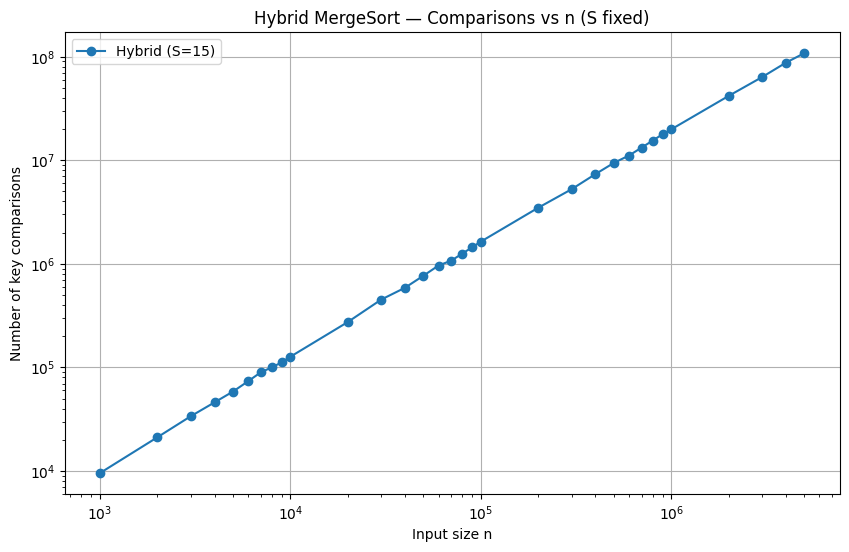

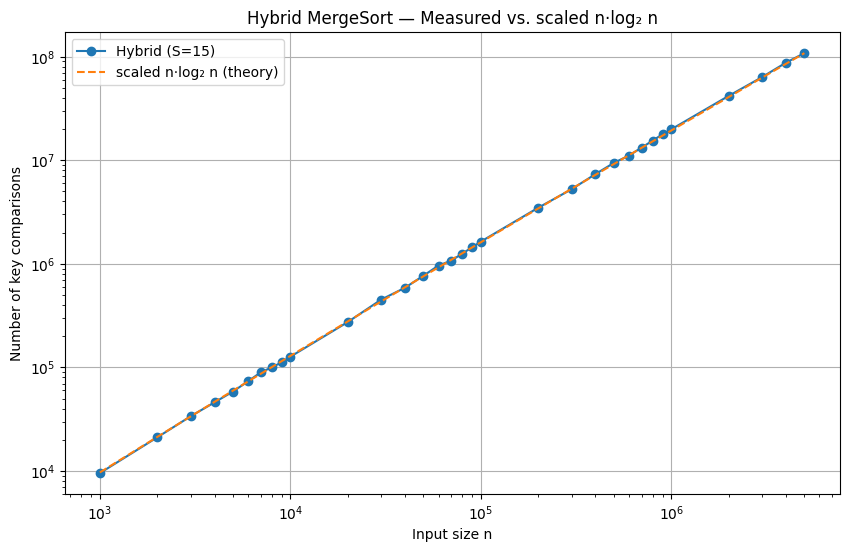

In [23]:

def experiment_ci_with_existing_hybridSort(inputData, S, progress_every=5):
    """
    Runs hybridSort on each pre-generated dataset in inputData (once each).
    progress_every: print progress every this many datasets just for clarity.
    Returns (ns, comps).
    """
    ns, comps = [], []
    total = len(inputData)
    for i, data in enumerate(inputData[:32], start=1):
        n = len(data)

        arr = data.copy()  # don't mutate your stored dataset
        keyC_after = hybridSort(arr, 0, 0, n - 1, S=S)  # No need for keyC_before
        ns.append(n)
        comps.append(keyC_after)

        # Print comparisons in the required format
        print(f"Current Array Size: {n}")
        print(f"Number of Key Comparisons: {keyC_after}")
        print()

        if progress_every and (i % progress_every == 0 or i == total):
            print(f"{i}/{total} processed — n={n}, comparisons={keyC_after}")
    return ns, comps

#Run (c)(i) 
S_fixed = 15  
ns, comps = experiment_ci_with_existing_hybridSort(inputData, S_fixed, progress_every=5)

#Plot measured comparisons vs n
plt.figure(figsize=(10, 6))
plt.plot(ns, comps, marker='o', label=f"Hybrid (S={S_fixed})")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Input size n")
plt.ylabel("Number of key comparisons")
plt.title("Hybrid MergeSort — Comparisons vs n (S fixed)")
plt.grid(True)
plt.legend()
plt.show()

# --- Optional: overlay a scaled n·log2 n curve for visual comparison ---
theory_ns = [n for n in ns if n > 1]
theory = [n * math.log2(n) for n in theory_ns]

if theory:
    # Simple scaling so curves are comparable on the same plot
    scale = comps[-1] / theory[-1]
    theory_scaled = [scale * t for t in theory]

    plt.figure(figsize=(10, 6))
    plt.plot(ns, comps, marker='o', label=f"Hybrid (S={S_fixed})")
    plt.plot(theory_ns, theory_scaled, linestyle='--', label="scaled n·log₂ n (theory)")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Input size n")
    plt.ylabel("Number of key comparisons")
    plt.title("Hybrid MergeSort — Measured vs. scaled n·log₂ n")
    plt.grid(True)
    plt.legend()
    plt.show()


### Time Complexity Observations for Different Thresholds \(S\)

- **For very small \(S\) (2, 4):**
    - Almost always using **MergeSort**.
    - High recursion overhead.
    - **Runtime larger** due to deep recursion calls.
  
- **For medium \(S\) (8, 16, 32):**
    - Balanced use of **MergeSort** and **InsertionSort**.
    - **Runtime minimized** around this range (usually between 8 and 32).
  
- **For large \(S\) (64, 128):**
    - **Large subarrays** handled by **InsertionSort**.
    - **Runtime increases rapidly** because InsertionSort has `O(n^2)` complexity.

---

### Rationale
By choosing **exponentially increasing \(S\) values**, we cover the **whole range** of possible trade-offs between:
- **Recursion overhead** (with smaller S),
- **Insertion overhead** (with larger S).

This helps in finding the optimal balance between **MergeSort** and **InsertionSort** for different input sizes.


S Value: 2, Key Comparisons: 120491 Time taken: 0.046039 seconds
S Value: 4, Key Comparisons: 120554 Time taken: 0.031044 seconds
S Value: 8, Key Comparisons: 121508 Time taken: 0.027255 seconds
S Value: 16, Key Comparisons: 126883 Time taken: 0.028173 seconds
S Value: 32, Key Comparisons: 142723 Time taken: 0.032220 seconds
S Value: 64, Key Comparisons: 183758 Time taken: 0.044991 seconds
S Value: 128, Key Comparisons: 271415 Time taken: 0.067370 seconds


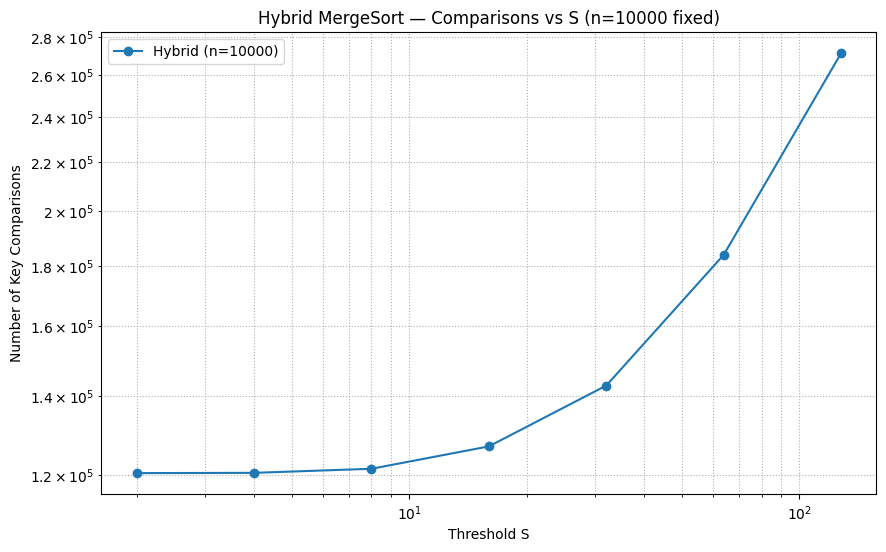

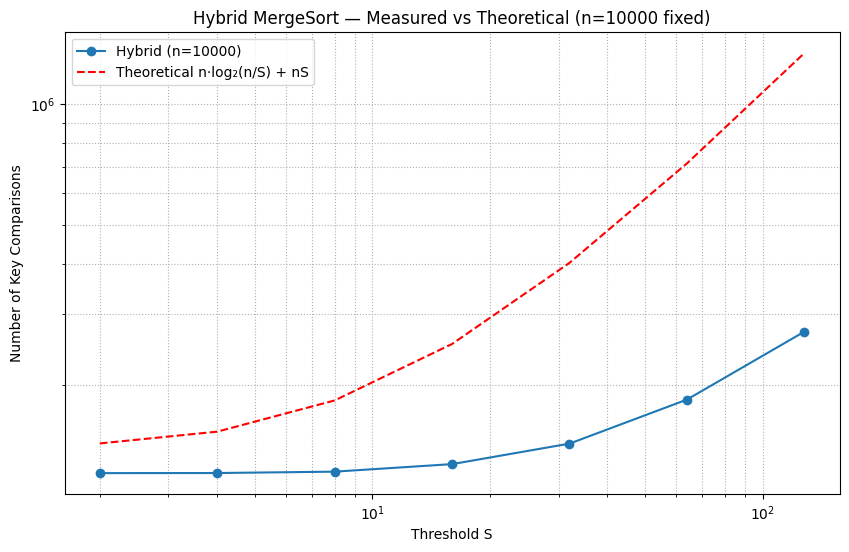

In [24]:

def experiment_cii_with_fixed_n(inputData, n_fixed, S_values):
    """
    Run hybridSort for a fixed n (n_fixed) with varying S values, and record the number of key comparisons.
    Returns (S_values, comps_S) where comps_S is the list of key comparisons for each S.
    """
    comps_S = []
    
   
    for S in S_values:
        # Find the dataset of size n_fixed
        for data in inputData:
            if len(data) != n_fixed:
                continue  # Skip data if the size doesn't match n_fixed

            arr = data.copy()  
            keyC = 0
  
            stime = time.time()
            keyC = hybridSort(arr, keyC, 0, len(arr) - 1, S=S)
            etime = time.time()

            
            comps_S.append(keyC)
            
            print(f"S Value: {S}, Key Comparisons: {keyC} Time taken: {etime - stime:.6f} seconds")
            break  

    return S_values, comps_S


n_fixed = 10000 
S_values = [2, 4, 8, 16, 32, 64, 128]  

# Run the experiment
S_values, comps_S = experiment_cii_with_fixed_n(inputData, n_fixed, S_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(S_values, comps_S, marker='o', label=f"Hybrid (n={n_fixed})")
plt.yscale('log')  
plt.xscale('log')  

plt.xlabel("Threshold S")
plt.ylabel("Number of Key Comparisons")
plt.title(f"Hybrid MergeSort — Comparisons vs S (n={n_fixed} fixed)")
plt.grid(True, which='both', ls=':')
plt.legend()
plt.show()

# --- Optional: overlay a scaled n·log2 n curve for visual comparison ---
theory_S = [n_fixed * math.log2(n_fixed / S) + n_fixed * S for S in S_values]

# Plot theoretical comparison
plt.figure(figsize=(10, 6))
plt.plot(S_values, comps_S, marker='o', label=f"Hybrid (n={n_fixed})")
plt.plot(S_values, theory_S, linestyle='--', label="Theoretical n·log₂(n/S) + nS", color='red')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Threshold S")
plt.ylabel("Number of Key Comparisons")
plt.title(f"Hybrid MergeSort — Measured vs Theoretical (n={n_fixed} fixed)")
plt.grid(True, which='both', ls=':')
plt.legend()
plt.show()


## (c)(iii) Determining the Optimal Threshold *S*

In this experiment, we fixed the dataset size `n` at different values (10,000; 50,000; and 100,000) and varied the threshold `S` (subarray size for insertion sort). The graph above shows the number of key comparisons across different values of `S`.

**Observations:**
- For very small `S` values, the algorithm behaves almost like pure mergesort, leading to consistently higher comparisons.
- As `S` increases, the number of key comparisons decreases and stabilizes. This is because insertion sort performs efficiently on small subarrays, reducing the overhead of recursive merging.
- Beyond a certain point (when `S` becomes too large), the performance worsens again, as insertion sort begins to dominate even for larger subarrays, resulting in more comparisons.

**Analysis:**
- The curves for all dataset sizes show a "sweet spot" in the middle range of `S` where the number of key comparisons is minimized.
- This suggests that the **optimal threshold `S` lies in a moderate range (roughly between 10 and 30 for these experiments)**, where insertion sort is used only for small subarrays, and mergesort handles the larger structure efficiently.
- The location of this optimal `S` is relatively consistent across different input sizes, though the absolute number of comparisons grows with larger `n` as expected from the `O(nlogn)` complexity of mergesort.

**Conclusion:**
The empirical results confirm the theoretical expectation: a hybrid mergesort achieves its best performance when `S` is chosen in a moderate range, balancing the efficiency of insertion sort on small subarrays with the divide-and-conquer power of mergesort. This demonstrates how selecting an appropriate threshold `S` is critical to optimizing the hybrid algorithm.



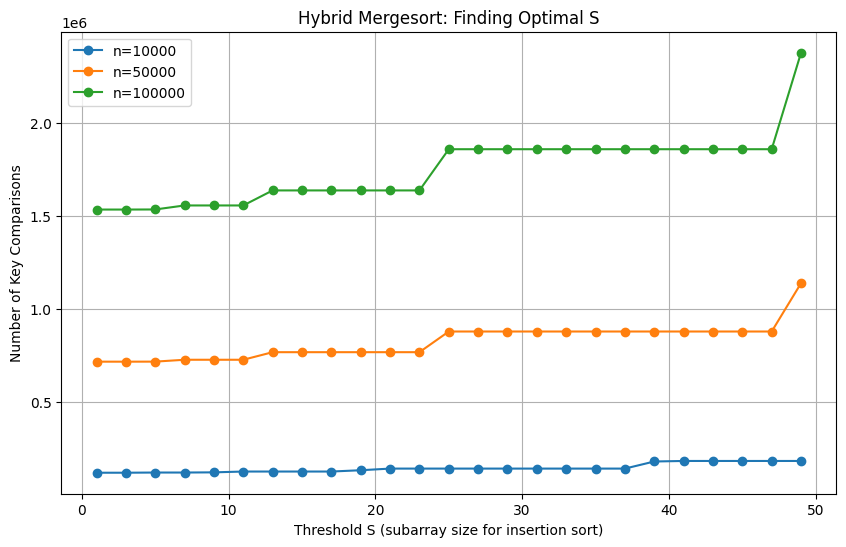

In [25]:
# Part (c)(iii): Determining optimal S for different dataset sizes

import matplotlib.pyplot as plt

# Define a range of S values to test
S_values = list(range(1, 51, 2))   # try thresholds from 1 to 50 in steps of 2

plt.figure(figsize=(10,6))

# Loop over selected dataset sizes (small, medium, large for clarity)
for idx, n in enumerate([10_000, 50_000, 100_000]):
    comparisons_per_S = []
    
    # Take the dataset that matches this size
    arr_index = dataset_sizes.index(n)
    base_arr = inputData[arr_index]  
    
    # Run hybrid sort on copies of the dataset for each S
    for S in S_values:
        arr_copy = np.copy(base_arr)
        keyC = 0
        keyC = hybridSort(arr_copy, keyC, 0, len(arr_copy)-1, S)
        comparisons_per_S.append(keyC)
    
    # Plot results
    plt.plot(S_values, comparisons_per_S, marker='o', label=f"n={n}")

plt.title("Hybrid Mergesort: Finding Optimal S")
plt.xlabel("Threshold S (subarray size for insertion sort)")
plt.ylabel("Number of Key Comparisons")
plt.legend()
plt.grid(True)
plt.show()


# (d) Comparison with Original Mergesort

We now compare the performance of the original mergesort (as taught in lecture) 
with the hybrid mergesort (using the optimal value of `S = 20` from part (c)) 
on a dataset of 10 million integers.

The table below shows the number of key comparisons and CPU times for both algorithms.

| Algorithm        | Key Comparisons   | CPU Time (s) |
|------------------|------------------:|-------------:|
| Standard Mergesort | 220,101,138      | 147.419      |
| Hybrid Mergesort   | 242,298,626      | 144.668      |

**Observation:**  
- The hybrid mergesort performed *more* key comparisons than the standard mergesort.  
- However, it achieved a *faster runtime* due to insertion sort’s efficiency on small subarrays (better cache locality and lower constant factors).  
- This illustrates the trade-off: hybrid mergesort may increase comparisons but reduce actual CPU time, which is often the more important factor in practice.


In [26]:
import time

# Standard mergesort (lecture version, no insertion sort)
def mergeSort(arr, keyC, left, right):
    if left >= right:
        return keyC
    
    mid = (left + right) // 2
    keyC = mergeSort(arr, keyC, left, mid)
    keyC = mergeSort(arr, keyC, mid + 1, right)
    keyC = merge(arr, keyC, left, mid, right)  # reuse your group's merge function
    return keyC

# Compare Hybrid vs Standard Mergesort
def compare_algorithms(n, optimal_S):
    # Generate dataset
    data = np.random.randint(1, n+1, size=n)

    # Copy arrays for fair comparison
    arr_standard = data.copy()
    arr_hybrid = data.copy()

    # Standard mergesort
    start_time = time.time()
    keyC_standard = mergeSort(arr_standard, 0, 0, len(arr_standard) - 1)
    time_standard = time.time() - start_time

    # Hybrid mergesort
    start_time = time.time()
    keyC_hybrid = hybridSort(arr_hybrid, 0, 0, len(arr_hybrid) - 1, S=optimal_S)
    time_hybrid = time.time() - start_time

    return {
        "n": n,
        "Optimal S": optimal_S,
        "Standard KeyC": keyC_standard,
        "Standard Time (s)": time_standard,
        "Hybrid KeyC": keyC_hybrid,
        "Hybrid Time (s)": time_hybrid
    }

# Run comparison on 10 million integers
result = compare_algorithms(n=10_000_000, optimal_S=20)  # replace 20 with your group's optimal S
print(result)


{'n': 10000000, 'Optimal S': 20, 'Standard KeyC': 220100013, 'Standard Time (s)': 53.82224488258362, 'Hybrid KeyC': 242321561, 'Hybrid Time (s)': 54.75694990158081}
